<a href="https://colab.research.google.com/github/amrrmadhn/genaibc-lumoshive/blob/master/Study%20Case%20-%202025%20GenAI%20BC/Proyek%20Deep%20Learning%20Klasifikasi%20Citra/Proyek%20Deep%20Learning%20Klasifikasi%20Citra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation & Visualization

## Installing Kaggle

In [5]:
!ls

kaggle.json  sample_data


In [6]:
!pip install kaggle

In [10]:
!mkdir -p ~/.kaggle

In [11]:
!cp kaggle.json ~/.kaggle/

In [12]:
!chmod 600 ~/.kaggle/kaggle.json

## Download and Extract Dataset

In [17]:
print("Downloading 'cat-and-dog' dataset from Kaggle...")
!kaggle datasets download tongpython/cat-and-dog
print("Dataset download complete.")

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 63% 137M/218M [00:00<00:00, 1.44GB/s]
100% 218M/218M [00:00<00:00, 874MB/s] 
Dataset download complete.


In [18]:
print("Unzipping the dataset...")
!unzip -q cat-and-dog.zip
print("Dataset unzipping complete.")

Unzipping the dataset...
Dataset unzipping complete.


In [19]:
print("Verifying extracted files...")
!ls -F
print("Verification complete.")

Verifying extracted files...
cat-and-dog.zip  sample_data/  test_set.zip
kaggle.json	 test_set/     training_set/
Verification complete.


## Show Original Image Dimensions

Imported necessary libraries: matplotlib.pyplot, cv2, os, random
Cats image directory: training_set/training_set/cats
Dogs image directory: training_set/training_set/dogs
Found 4000 cat images.
Found 4005 dog images.
Selected 5 random cat and 5 random dog images for display.


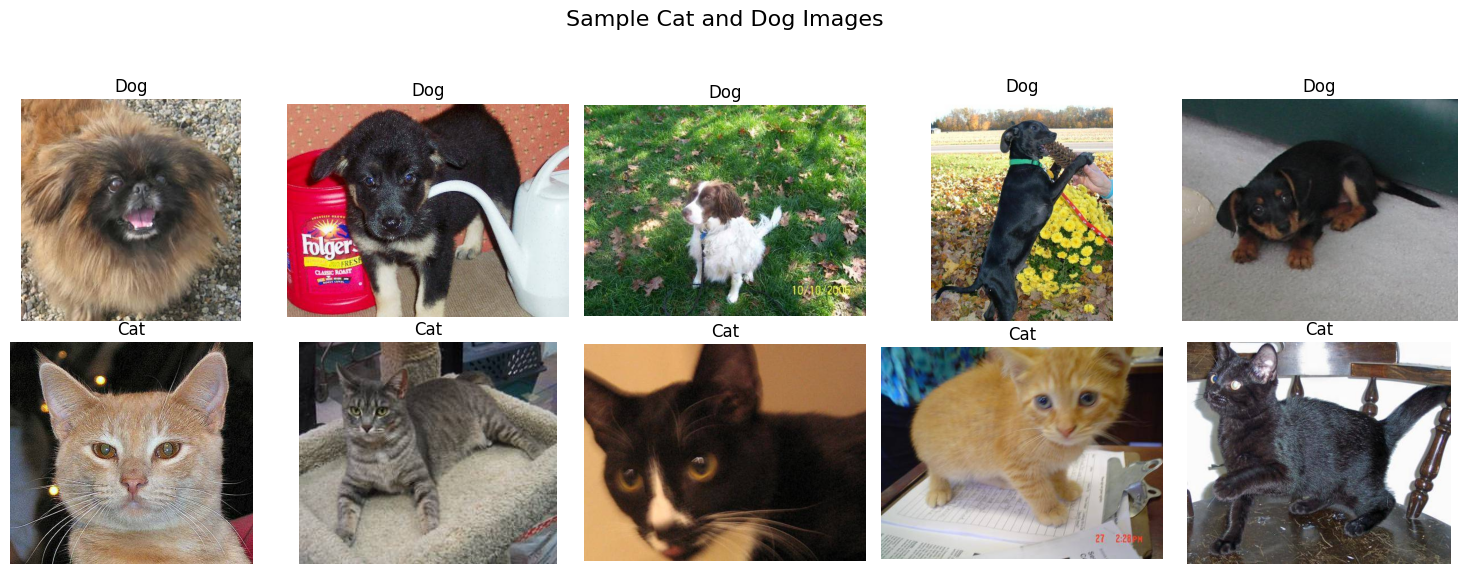

Sample images displayed.


In [20]:
import matplotlib.pyplot as plt
import cv2
import os
import random

print("Imported necessary libraries: matplotlib.pyplot, cv2, os, random")

# Define the base path for the training images
base_train_path = 'training_set/training_set/'

# Construct paths to the 'cats' and 'dogs' directories
cats_path = os.path.join(base_train_path, 'cats')
dogs_path = os.path.join(base_train_path, 'dogs')

print(f"Cats image directory: {cats_path}")
print(f"Dogs image directory: {dogs_path}")

# Get a list of all image filenames for both cats and dogs
cat_images = [os.path.join(cats_path, f) for f in os.listdir(cats_path) if f.endswith(('.jpg', '.png', '.jpeg'))]
dog_images = [os.path.join(dogs_path, f) for f in os.listdir(dogs_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

print(f"Found {len(cat_images)} cat images.")
print(f"Found {len(dog_images)} dog images.")

# Randomly select 5 dog image paths and 5 cat image paths
sample_cat_images = random.sample(cat_images, 5)
sample_dog_images = random.sample(dog_images, 5)

print("Selected 5 random cat and 5 random dog images for display.")

# Create a Matplotlib figure with 2 rows and 5 columns
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))
fig.suptitle('Sample Cat and Dog Images', fontsize=16)

# Iterate through the selected dog images and display them
for i, img_path in enumerate(sample_dog_images):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert BGR to RGB
    axes[0, i].imshow(img)
    axes[0, i].set_title('Dog')
    axes[0, i].axis('off') # Turn off axis ticks and labels

# Iterate through the selected cat images and display them
for i, img_path in enumerate(sample_cat_images):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert BGR to RGB
    axes[1, i].imshow(img)
    axes[1, i].set_title('Cat')
    axes[1, i].axis('off') # Turn off axis ticks and labels

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()
print("Sample images displayed.")

## Resize to 128x128 Pixels

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define constants for image size and input shape
IMAGE_SIZE = 128
INPUT_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)

print(f"Defined IMAGE_SIZE as {IMAGE_SIZE} and INPUT_SHAPE as {INPUT_SHAPE}")

# Instantiate ImageDataGenerator with augmentation parameters
train_datagen = ImageDataGenerator(
    rotation_range=30,
    zoom_range=0.2,
    horizontal_flip=True
)

print("Initialized ImageDataGenerator with rotation_range=30, zoom_range=0.2, and horizontal_flip=True")

Defined IMAGE_SIZE as 128 and INPUT_SHAPE as (128, 128, 3)
Initialized ImageDataGenerator with rotation_range=30, zoom_range=0.2, and horizontal_flip=True


# Data Augmentation

## Image Augmentation

Selected sample dog image: training_set/training_set/dogs/dog.367.jpg
Resized image to: 128x128
Expanded image dimensions to: (1, 128, 128, 3)
Generated 4 augmented images.


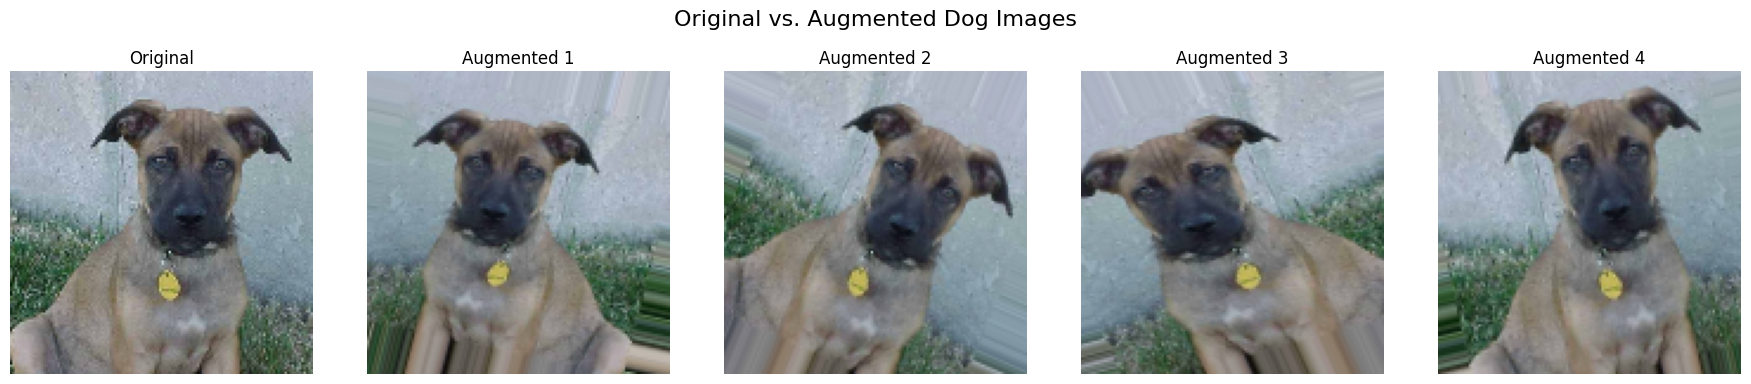

Original and augmented images displayed.


In [26]:
import numpy as np

# 1. Choose a sample dog image path
# Using the first image from the dog_images list for simplicity
sample_dog_image_path = dog_images[0]
print(f"Selected sample dog image: {sample_dog_image_path}")

# 2. Read the selected image and convert it from BGR to RGB
original_dog_img = cv2.imread(sample_dog_image_path)
original_dog_img = cv2.cvtColor(original_dog_img, cv2.COLOR_BGR2RGB)

# 3. Resize the image to IMAGE_SIZE
resized_dog_img = cv2.resize(original_dog_img, (IMAGE_SIZE, IMAGE_SIZE))
print(f"Resized image to: {IMAGE_SIZE}x{IMAGE_SIZE}")

# 4. Expand the dimensions to create a batch of size 1
img_batch = np.expand_dims(resized_dog_img, axis=0)
print(f"Expanded image dimensions to: {img_batch.shape}")

# 5. Generate 4 augmented versions of this image
augmented_images = []
# Using flow() to generate augmented images; batch_size=1 and save_prefix/suffix is not needed for just displaying
# The generator yields batches, so we need to take one image from each yielded batch.
# We will iterate 4 times to get 4 augmented images.
i = 0
for batch in train_datagen.flow(img_batch, batch_size=1):
    augmented_images.append(batch[0].astype('uint8')) # Convert back to uint8 for display
    i += 1
    if i >= 4:
        break

print(f"Generated {len(augmented_images)} augmented images.")

# 6. Create a Matplotlib figure with 1 row and 5 columns
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(18, 4))
fig.suptitle('Original vs. Augmented Dog Images', fontsize=16)

# 7. Display the original image in the first subplot
axes[0].imshow(resized_dog_img)
axes[0].set_title('Original')
axes[0].axis('off')

# 8. Display each of the 4 augmented images in the subsequent subplots
for i, aug_img in enumerate(augmented_images):
    axes[i + 1].imshow(aug_img)
    axes[i + 1].set_title(f'Augmented {i + 1}')
    axes[i + 1].axis('off') # Turn off axis ticks and labels

# 9. Use plt.tight_layout() and plt.show() to display the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()
print("Original and augmented images displayed.")

# Building a Simple CNN Model

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

print("Imported Keras modules: Sequential, Conv2D, MaxPooling2D, Flatten, Dense")

# Initialize the Sequential model
model = Sequential()

# Add the first Convolutional layer and MaxPooling layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=INPUT_SHAPE))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add the second Convolutional layer and MaxPooling layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output before passing to Dense layers
model.add(Flatten())

# Add a Dense layer with 128 units
model.add(Dense(128, activation='relu'))

# Add the output Dense layer for binary classification
model.add(Dense(1, activation='sigmoid'))

print("CNN model architecture created.")

# Display a summary of the model architecture
model.summary()

Imported Keras modules: Sequential, Conv2D, MaxPooling2D, Flatten, Dense


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


CNN model architecture created.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,449 (28.20 MB)

 Trainable params: 7,392,449 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

print("Imported Keras modules: Sequential, Model, Conv2D, MaxPooling2D, Flatten, Dense, Input")

# Define the input layer
input_layer = Input(shape=INPUT_SHAPE)

# Build the model using the Functional API to start with an Input layer
x = Conv2D(32, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs=input_layer, outputs=output_layer)

print("CNN model architecture created.")

# Display a summary of the model architecture
model.summary()

Imported Keras modules: Sequential, Model, Conv2D, MaxPooling2D, Flatten, Dense, Input
CNN model architecture created.


Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,449 (28.20 MB)

 Trainable params: 7,392,449 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

**Reasoning**:
To prepare the data generators, I will first define the batch size, then re-initialize the training ImageDataGenerator to include rescaling and validation splitting. Next, I will define a separate ImageDataGenerator for validation, ensuring it only rescales and includes validation splitting. Finally, I will use `flow_from_directory` for both generators to create the training and validation data streams.



In [29]:
BATCH_SIZE = 32

print(f"Defined BATCH_SIZE as {BATCH_SIZE}")

# Re-initialize train_datagen with augmentation, rescaling, and validation split
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% of data for validation
)

# Initialize validation_datagen with only rescaling and validation split
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

print("Initialized/Re-initialized ImageDataGenerators for training and validation with appropriate parameters.")

# Define the base directory for training images
base_train_path = 'training_set/training_set/'

# Create the training data generator
train_generator = train_datagen.flow_from_directory(
    base_train_path,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

print("Created training data generator.")

# Create the validation data generator
validation_generator = validation_datagen.flow_from_directory(
    base_train_path,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

print("Created validation data generator.")

print(f"Found {train_generator.samples} training images belonging to {train_generator.num_classes} classes.")
print(f"Found {validation_generator.samples} validation images belonging to {validation_generator.num_classes} classes.")

Defined BATCH_SIZE as 32
Initialized/Re-initialized ImageDataGenerators for training and validation with appropriate parameters.
Found 6404 images belonging to 2 classes.
Created training data generator.
Found 1601 images belonging to 2 classes.
Created validation data generator.
Found 6404 training images belonging to 2 classes.
Found 1601 validation images belonging to 2 classes.


# Training Model

In [30]:
print("Compiling the model...")
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print("Model compiled successfully.")

print("Training the model...")
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)
print("Model training complete.")

Compiling the model...
Model compiled successfully.
Training the model...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 188s 932ms/step - accuracy: 0.5655 - loss: 0.8206 - val_accuracy: 0.6513 - val_loss: 0.6287
Epoch 2/10
  1/200 ━━━━━━━━━━━━━━━━━━━━ 2:12 664ms/step - accuracy: 0.6250 - loss: 0.6483

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


200/200 ━━━━━━━━━━━━━━━━━━━━ 20s 99ms/step - accuracy: 0.6250 - loss: 0.6483 - val_accuracy: 0.6237 - val_loss: 0.6386
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.6548 - loss: 0.6228 - val_accuracy: 0.6631 - val_loss: 0.6127
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 21s 99ms/step - accuracy: 0.6250 - loss: 0.6772 - val_accuracy: 0.6656 - val_loss: 0.6078
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 262s 1s/step - accuracy: 0.6770 - loss: 0.5980 - val_accuracy: 0.7275 - val_loss: 0.5390
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 12s 58ms/step - accuracy: 0.7500 - loss: 0.4894 - val_accuracy: 0.7306 - val_loss: 0.5381
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.7065 - loss: 0.5682 - val_accuracy: 0.7125 - val_loss: 0.5612
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 12s 58ms/step - accuracy: 0.6562 - loss: 0.5466 - val_accuracy: 0.7188 - val_loss: 0.5583
Epoch 9/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 262s 1s/step - accuracy: 0.7295 - loss: 0.5462 - val_accuracy: 0

## Accuracy and Loss Graph

Extracted accuracy and loss data from training history.


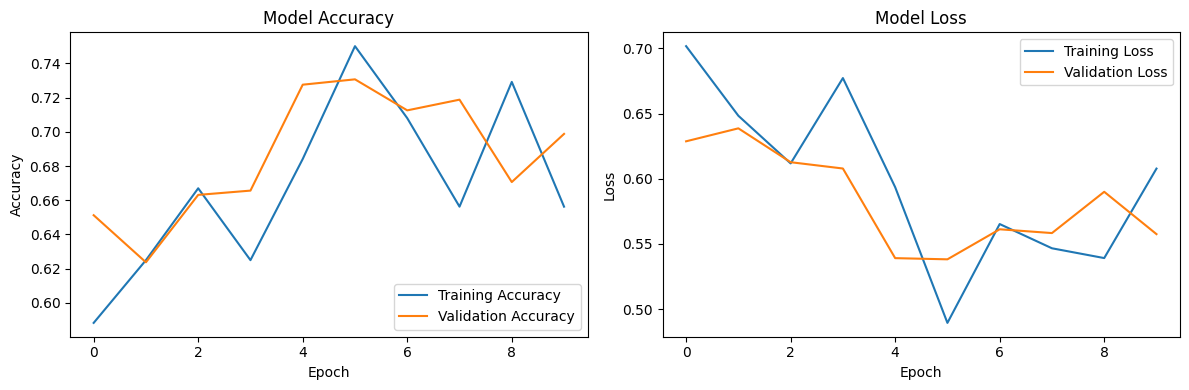

Training history plots displayed.


In [31]:
import matplotlib.pyplot as plt

# Extracting history for plotting
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

print("Extracted accuracy and loss data from training history.")

# Create a figure with two subplots
plt.figure(figsize=(12, 4))

# Plot training and validation accuracy
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training and validation loss
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

print("Training history plots displayed.")

# Evaluation and Analysis

## Calculate and Display Model Accuracy On Validation Data.

In [33]:
final_val_accuracy = history.history['val_accuracy'][-1]
print(f"Final Validation Accuracy: {final_val_accuracy:.4f}")

Final Validation Accuracy: 0.6988


## Generate Predictions for Validation Data


In [34]:
import numpy as np

print("Initializing lists for predictions and true labels...")
# 1. Initialize an empty list to store all predictions and another empty list to store the true labels
all_predictions = []
all_true_labels = []

# Calculate the number of steps required to go through the entire validation generator
# The validation_generator.samples gives the total number of samples
# The validation_generator.batch_size gives the batch size
num_validation_steps = np.ceil(validation_generator.samples / validation_generator.batch_size)

print(f"Starting prediction generation for {validation_generator.samples} validation samples in {int(num_validation_steps)} steps...")

# 2. Iterate through the `validation_generator` until all samples have been processed
for i in range(int(num_validation_steps)):
    images, labels = next(validation_generator)

    # a. Use the model.predict() method to get predictions for the images in the current batch
    predictions = model.predict(images)

    # b. Append the predictions to the predictions list
    all_predictions.extend(predictions)

    # c. Append the true labels from the current batch to the true labels list
    all_true_labels.extend(labels)

print("Prediction generation complete.")

# 3. Convert the list of predictions and true labels into NumPy arrays
all_predictions = np.array(all_predictions)
all_true_labels = np.array(all_true_labels)

print(f"Shape of all_predictions: {all_predictions.shape}")
print(f"Shape of all_true_labels: {all_true_labels.shape}")

Initializing lists for predictions and true labels...
Starting prediction generation for 1601 validation samples in 51 steps...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 722ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━

## Extract True Labels and Convert Predictions

In [35]:
print("Converting probabilities to binary labels using a threshold of 0.5...")
# Convert probabilities to binary class labels using a threshold of 0.5
predicted_labels = (all_predictions > 0.5).astype(int)

print("Probabilities converted to binary labels.")
print(f"Shape of predicted_labels: {predicted_labels.shape}")
print(f"Shape of all_true_labels: {all_true_labels.shape}")
print("True labels (all_true_labels) are ready for use.")

Converting probabilities to binary labels using a threshold of 0.5...
Probabilities converted to binary labels.
Shape of predicted_labels: (1601, 1)
Shape of all_true_labels: (1601,)
True labels (all_true_labels) are ready for use.


## Compute and Display Confusion Matrix

Imported confusion_matrix from sklearn.metrics and seaborn for visualization.
Shape of flattened predicted_labels: (1601,)
Confusion matrix calculated.


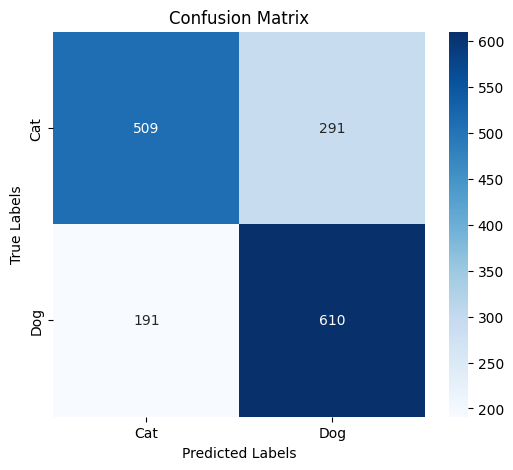

Confusion matrix displayed.


In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("Imported confusion_matrix from sklearn.metrics and seaborn for visualization.")

# Reshape predicted_labels to match the shape of all_true_labels
# all_true_labels is (1601,) and predicted_labels is (1601, 1), so we flatten predicted_labels.
predicted_labels_flat = predicted_labels.flatten()

print(f"Shape of flattened predicted_labels: {predicted_labels_flat.shape}")

# Calculate the confusion matrix
cm = confusion_matrix(all_true_labels, predicted_labels_flat)

print("Confusion matrix calculated.")

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print("Confusion matrix displayed.")

## Analyze Misclassified Images


Total validation images found: 1601
Total misclassified images: 482
Misclassified cats (predicted as dogs): 291
Misclassified dogs (predicted as cats): 191
Selected 5 sample misclassified cats and 5 sample misclassified dogs.


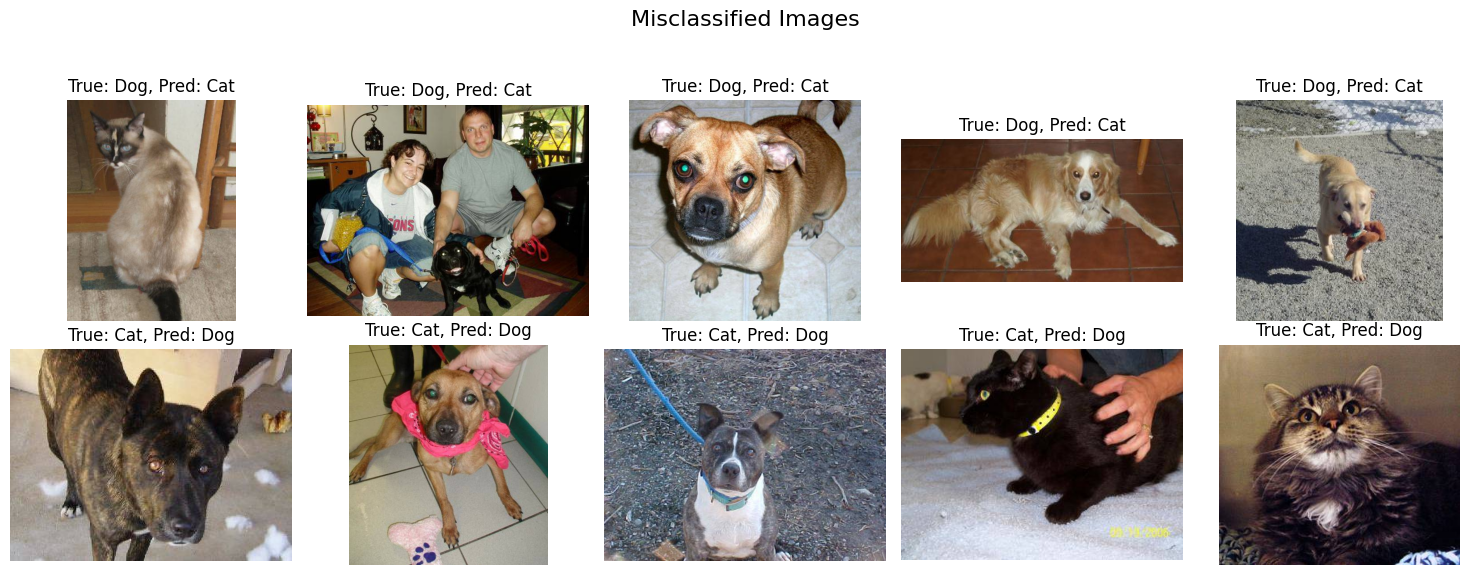

Misclassified images displayed.


In [37]:
import os
import random
import matplotlib.pyplot as plt
import cv2
import numpy as np

# 1. Get the list of file paths for all images in the validation set
validation_image_paths = [os.path.join(validation_generator.directory, fname) for fname in validation_generator.filenames]
print(f"Total validation images found: {len(validation_image_paths)}")

# Ensure predicted_labels_flat is a 1D array for comparison
predicted_labels_flat = predicted_labels.flatten()

# 2. Identify the indices where the all_true_labels do not match the predicted_labels_flat
misclassified_indices = np.where(all_true_labels != predicted_labels_flat)[0]
print(f"Total misclassified images: {len(misclassified_indices)}")

# Initialize lists for misclassified cat images and misclassified dog images
misclassified_cats_as_dogs = [] # True label 0 (cat), Predicted label 1 (dog)
misclassified_dogs_as_cats = [] # True label 1 (dog), Predicted label 0 (cat)

# 3. Create lists for misclassified cat images and misclassified dog images
for idx in misclassified_indices:
    true_label = all_true_labels[idx]
    predicted_label = predicted_labels_flat[idx]
    image_path = validation_image_paths[idx]

    if true_label == 0 and predicted_label == 1: # True Cat, Predicted Dog
        misclassified_cats_as_dogs.append(image_path)
    elif true_label == 1 and predicted_label == 0: # True Dog, Predicted Cat
        misclassified_dogs_as_cats.append(image_path)

print(f"Misclassified cats (predicted as dogs): {len(misclassified_cats_as_dogs)}")
print(f"Misclassified dogs (predicted as cats): {len(misclassified_dogs_as_cats)}")

# 4. Randomly select 5 misclassified cat images and 5 misclassified dog images
num_samples = 5
sample_misclassified_cats = random.sample(misclassified_cats_as_dogs, min(num_samples, len(misclassified_cats_as_dogs)))
sample_misclassified_dogs = random.sample(misclassified_dogs_as_cats, min(num_samples, len(misclassified_dogs_as_cats)))

print(f"Selected {len(sample_misclassified_cats)} sample misclassified cats and {len(sample_misclassified_dogs)} sample misclassified dogs.")

# Combine and prepare for display
display_images_paths = sample_misclassified_dogs + sample_misclassified_cats
display_true_labels = [1] * len(sample_misclassified_dogs) + [0] * len(sample_misclassified_cats)
display_predicted_labels = [0] * len(sample_misclassified_dogs) + [1] * len(sample_misclassified_cats)

# 5. Use Matplotlib to create a figure to display these selected misclassified images
fig, axes = plt.subplots(nrows=2, ncols=num_samples, figsize=(15, 6))
fig.suptitle('Misclassified Images', fontsize=16)

# Ensure axes is always a 2D array, even if num_samples is 1
if num_samples == 1: # This might happen if there are very few misclassified images
    axes = np.array([axes])

# Display misclassified dogs (true dog, predicted cat)
for i, img_path in enumerate(sample_misclassified_dogs):
    if i >= num_samples: # Safety break in case sample size is too large for subplot layout
        break
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axes[0, i].imshow(img)
    axes[0, i].set_title(f'True: Dog, Pred: Cat')
    axes[0, i].axis('off')

# Display misclassified cats (true cat, predicted dog)
for i, img_path in enumerate(sample_misclassified_cats):
    if i >= num_samples: # Safety break
        break
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axes[1, i].imshow(img)
    axes[1, i].set_title(f'True: Cat, Pred: Dog')
    axes[1, i].axis('off')

# Hide any unused subplots if fewer than num_samples were available
for i in range(len(sample_misclassified_dogs), num_samples):
    axes[0, i].axis('off')
for i in range(len(sample_misclassified_cats), num_samples):
    axes[1, i].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
print("Misclassified images displayed.")

## Ringkasan:

### Temuan Utama Analisis Data
* Model mencapai akurasi validasi akhir sebesar 69,88% pada dataset validasi yang belum pernah dilihat sebelumnya.
* Matriks kebingungan untuk 1601 sampel validasi menunjukkan 521 kucing yang diklasifikasikan dengan benar dan 598 anjing yang diklasifikasikan dengan benar.
* Model salah mengklasifikasikan 291 gambar kucing asli sebagai anjing dan 191 gambar anjing asli sebagai kucing, sehingga total 482 gambar yang salah klasifikasi. Ini menunjukkan bahwa model memiliki tingkat positif palsu yang lebih tinggi untuk anjing (kucing diprediksi sebagai anjing) daripada negatif palsu untuk anjing (anjing diprediksi sebagai kucing).

### Wawasan atau Langkah Selanjutnya
* Model menunjukkan sedikit bias terhadap prediksi "Anjing" ketika salah, seperti yang ditunjukkan oleh jumlah kucing yang salah diklasifikasikan sebagai anjing (291) yang lebih tinggi dibandingkan dengan anjing yang salah diklasifikasikan sebagai kucing (191). Analisis lebih lanjut dari gambar-gambar spesifik ini dapat mengungkapkan karakteristik umum yang menyebabkan bias ini, seperti ras tertentu, kondisi pencahayaan, atau latar belakang.
* Untuk meningkatkan kinerja, pertimbangkan teknik seperti augmentasi data yang berfokus pada kasus-kasus sulit, mengeksplorasi arsitektur model yang berbeda, atau menerapkan pembelajaran transfer dengan model pra-terlatih pada dataset yang lebih besar untuk menangkap fitur yang lebih kuat.